In [1]:
import os
import glob
import numpy as np 
import cv2
import matplotlib.pyplot as plt
import skimage.io
import skimage.color
%matplotlib inline

In [2]:
def vid_2_frames(vid_path, output_path, extension = '.jpg'):
    '''
    Converting video to image sequences with specified extension
    Params:
    vid_path: Path where video is stored
    output_path: Path where the converted image should be stored
    extension: Desired image extension, by DEFAULT .jpg
    '''
    # Read the video from specified path
    cam = cv2.VideoCapture(vid_path) 

    try: 

        # creating a folder named output_path 
        if not os.path.exists(output_path): 
            os.makedirs(output_path) 

    # if not created then raise error 
    except OSError: 
        print ('Error: Creating directory of output path') 

    # frame 
    currentframe = 0
    
    print('For: ', vid_path)
    print()

    while(True): 

        # reading from frame 
        ret,frame = cam.read() 
        
        if ret: 
            # if video is still left continue creating images 
            #name = ('./'+ output_path +'/frame_' + str(currentframe) + extension)
            name = ('./{}/frame_{:04d}{}').format(output_path, currentframe, extension)
            print ('Creating...' + name) 

            # writing the extracted images 
            cv2.imwrite(name, frame) 

            # increasing counter so that it will 
            # show how many frames are created 
            currentframe += 1
        else: 
            break
    
    # Release all space and windows once done 
    cam.release() 
    cv2.destroyAllWindows() 

In [3]:
def retrieve_filename(file_path):
    '''
    Retrieve file name from path and remove file extension
    '''
    base_name = os.path.basename(file_path)
    
    #extract base name without extension
    base_name = os.path.splitext(base_name)[0]
    
    #print(base_name)
    
    return base_name

In [4]:
vid_path = '7-12-17-preprocessed.avi'
output_path = retrieve_filename(vid_path)

vid_2_frames(vid_path, output_path, extension = '.jpg')

For:  7-12-17-preprocessed.avi

Creating..../7-12-17-preprocessed/frame_0000.jpg
Creating..../7-12-17-preprocessed/frame_0001.jpg
Creating..../7-12-17-preprocessed/frame_0002.jpg
Creating..../7-12-17-preprocessed/frame_0003.jpg
Creating..../7-12-17-preprocessed/frame_0004.jpg
Creating..../7-12-17-preprocessed/frame_0005.jpg
Creating..../7-12-17-preprocessed/frame_0006.jpg
Creating..../7-12-17-preprocessed/frame_0007.jpg
Creating..../7-12-17-preprocessed/frame_0008.jpg
Creating..../7-12-17-preprocessed/frame_0009.jpg
Creating..../7-12-17-preprocessed/frame_0010.jpg
Creating..../7-12-17-preprocessed/frame_0011.jpg
Creating..../7-12-17-preprocessed/frame_0012.jpg
Creating..../7-12-17-preprocessed/frame_0013.jpg
Creating..../7-12-17-preprocessed/frame_0014.jpg
Creating..../7-12-17-preprocessed/frame_0015.jpg
Creating..../7-12-17-preprocessed/frame_0016.jpg
Creating..../7-12-17-preprocessed/frame_0017.jpg
Creating..../7-12-17-preprocessed/frame_0018.jpg
Creating..../7-12-17-preprocessed/fra

Creating..../7-12-17-preprocessed/frame_0561.jpg
Creating..../7-12-17-preprocessed/frame_0562.jpg
Creating..../7-12-17-preprocessed/frame_0563.jpg
Creating..../7-12-17-preprocessed/frame_0564.jpg
Creating..../7-12-17-preprocessed/frame_0565.jpg
Creating..../7-12-17-preprocessed/frame_0566.jpg
Creating..../7-12-17-preprocessed/frame_0567.jpg
Creating..../7-12-17-preprocessed/frame_0568.jpg
Creating..../7-12-17-preprocessed/frame_0569.jpg
Creating..../7-12-17-preprocessed/frame_0570.jpg
Creating..../7-12-17-preprocessed/frame_0571.jpg
Creating..../7-12-17-preprocessed/frame_0572.jpg
Creating..../7-12-17-preprocessed/frame_0573.jpg
Creating..../7-12-17-preprocessed/frame_0574.jpg
Creating..../7-12-17-preprocessed/frame_0575.jpg
Creating..../7-12-17-preprocessed/frame_0576.jpg
Creating..../7-12-17-preprocessed/frame_0577.jpg
Creating..../7-12-17-preprocessed/frame_0578.jpg
Creating..../7-12-17-preprocessed/frame_0579.jpg
Creating..../7-12-17-preprocessed/frame_0580.jpg
Creating..../7-12-17

In [5]:
def img_to_array(inp_img, RGB = True):
    '''
    Convert single image from RGB or from Grayscale to array
    Params:
    inp_img: Desire image to convert to array
    RGB: Convert RGB image to grayscale if FALSE
    '''
    if RGB:
        return skimage.io.imread(inp_img)
    else:
        img = skimage.io.imread(inp_img)
        grayscale = skimage.color.rgb2gray(img)
        
        return grayscale
    

def imgs_to_arrays(inp_imgs, extension = '.jpg', RGB = True, save_as_npy = False, save_path = None):
    '''
    Convert image stacks from RGB or from Grayscale to array
    Params:
    inp_imgs: Desire image stacks to convert to array
    extension: input images extension, by DEFAULT '.jpg'
    RGB: Convert RGB image to grayscale if FALSE
    save_as_npy: Save as .npy extension
    save_path: Specify save path
    '''
   
    imgs_list = []
    for imgs in sorted(glob.glob('{}/*{}'.format(inp_imgs, extension))):
        img_array = img_to_array(imgs, RGB)
        imgs_list.append(img_array)
    
    imgs_list = np.asarray(imgs_list)
    
    if save_as_npy:
        assert save_path!= None, "Save path not specified!"
        #by default
        if not os.path.exists(save_path): 
            os.makedirs(save_path) 
            
        save_name = retrieve_filename(inp_imgs)
        np.save(save_path + '/{}.npy'.format(save_name), imgs_list)
        
    return imgs_list

In [6]:
sorted(os.listdir('7-12-17-preprocessed'))

['frame_0000.jpg',
 'frame_0001.jpg',
 'frame_0002.jpg',
 'frame_0003.jpg',
 'frame_0004.jpg',
 'frame_0005.jpg',
 'frame_0006.jpg',
 'frame_0007.jpg',
 'frame_0008.jpg',
 'frame_0009.jpg',
 'frame_0010.jpg',
 'frame_0011.jpg',
 'frame_0012.jpg',
 'frame_0013.jpg',
 'frame_0014.jpg',
 'frame_0015.jpg',
 'frame_0016.jpg',
 'frame_0017.jpg',
 'frame_0018.jpg',
 'frame_0019.jpg',
 'frame_0020.jpg',
 'frame_0021.jpg',
 'frame_0022.jpg',
 'frame_0023.jpg',
 'frame_0024.jpg',
 'frame_0025.jpg',
 'frame_0026.jpg',
 'frame_0027.jpg',
 'frame_0028.jpg',
 'frame_0029.jpg',
 'frame_0030.jpg',
 'frame_0031.jpg',
 'frame_0032.jpg',
 'frame_0033.jpg',
 'frame_0034.jpg',
 'frame_0035.jpg',
 'frame_0036.jpg',
 'frame_0037.jpg',
 'frame_0038.jpg',
 'frame_0039.jpg',
 'frame_0040.jpg',
 'frame_0041.jpg',
 'frame_0042.jpg',
 'frame_0043.jpg',
 'frame_0044.jpg',
 'frame_0045.jpg',
 'frame_0046.jpg',
 'frame_0047.jpg',
 'frame_0048.jpg',
 'frame_0049.jpg',
 'frame_0050.jpg',
 'frame_0051.jpg',
 'frame_0052

In [7]:
test_list = imgs_to_arrays('7-12-17-preprocessed', RGB = False)

In [8]:
test_list02 = imgs_to_arrays('7-12-17-preprocessed', RGB = False, save_as_npy = True, save_path = 'test_npy' )

(203, 203)


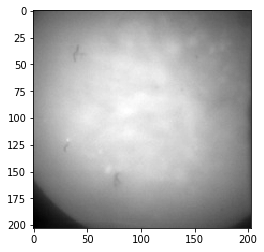

In [9]:
print(test_list[0].shape)
plt.imshow(test_list[0], cmap = 'gray')
plt.show()

(203, 203)


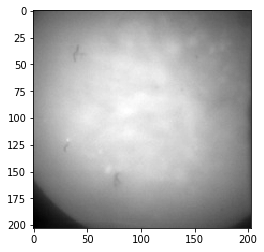

In [10]:
#sanity check!

test_list03 = np.load('test_npy/7-12-17-preprocessed.npy')
print(test_list03[0].shape)
plt.imshow(test_list03[0], cmap = 'gray')
plt.show()